# stitch_satchunks_by_date

- Take all satellite chunks for each day and stitch them together
- Remove those that cover less than one half of the glacier
- Crop remaining miages to the study area
- Move final files into a new folder to prepare for autoRIFT velocity mapping

In [69]:
import rasterio as rio
from rasterio.mask import mask
import cv2
import fiona
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import os
import subprocess
import shutil
from scipy.interpolate import interp2d
import glob 
import geopandas as gpd
from shapely.geometry import mapping

In [ ]:
import sys
args = sys.argv
basepath = args[1]
glacier_shp = args[2]

inputs: -img_path -glacier_shpfile_path

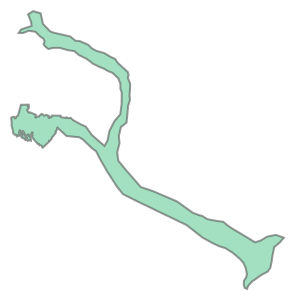

In [70]:
# path to glacier shapefile
# glacier_shp = '/Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/main_ice_outline.shp'
glacier_gdf = gpd.read_file(glacier_shp)
glacier = glacier_gdf.geometry.values
glacier[0]

In [73]:
# # SET IMAGE PATH
# basepath = '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/'

In [74]:
# grab all the unique dates
dates = []
for file in os.listdir(basepath+'stitched_by_sat/'): # path
    date = file.split('_')[1] # grab the date from the file name
    dates.append(date)
unique_dates = list(set(dates)) # save a list of the dates
unique_dates.sort() # sort the dates
print(unique_dates)

['20200904', '20200906', '20200909', '20200910', '20200911', '20200912', '20200913', '20200914', '20200915', '20200916', '20200918', '20200919', '20200924', '20200926', '20200929']


TILES FOR 20200904
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200904_2278.tif']


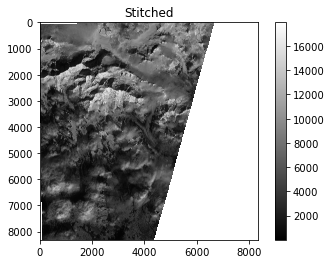

TILES FOR 20200906
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200906_100d.tif']


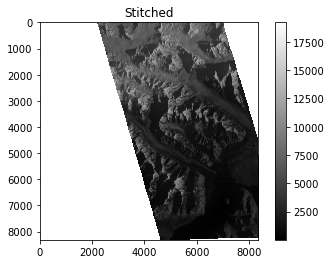

TILES FOR 20200909
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200909_106b.tif']


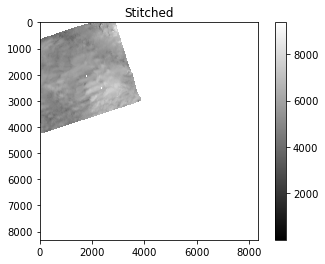

TILES FOR 20200910
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200910_1049.tif', '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200910_2263.tif', '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200910_106c.tif']


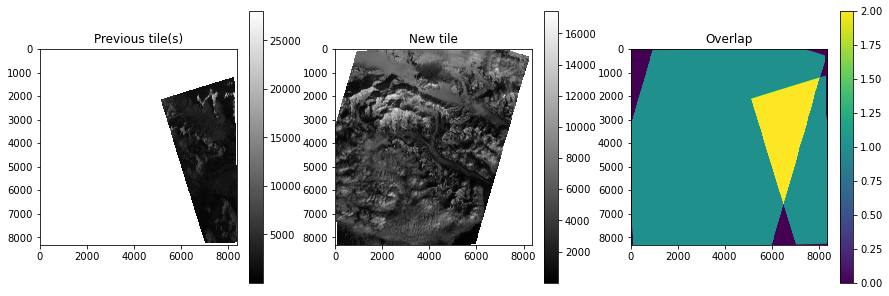

Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -23.965030319179277
New mean diff: 0.0


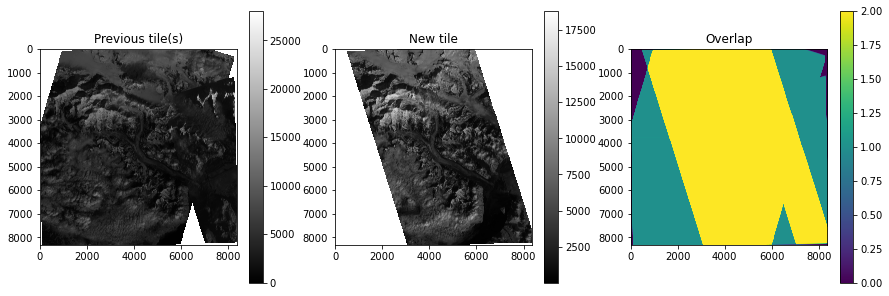

Previous tile is larger.
Mean difference in values from the larger tile in overlap area: 108.37146145907843
New mean diff: 0.0


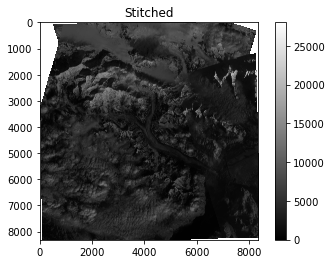

TILES FOR 20200911
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200911_100d.tif', '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200911_2212.tif']


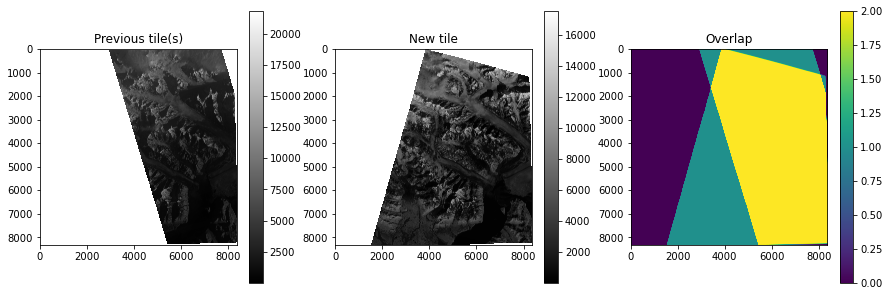

Previous tile is larger.
Mean difference in values from the larger tile in overlap area: 38.550871940895306
New mean diff: 0.0


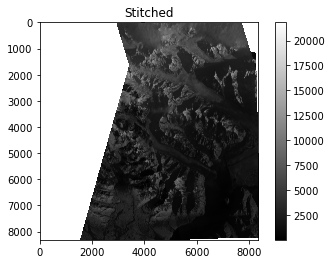

TILES FOR 20200912
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200912_1008.tif', '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200912_1065.tif', '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200912_2206.tif']


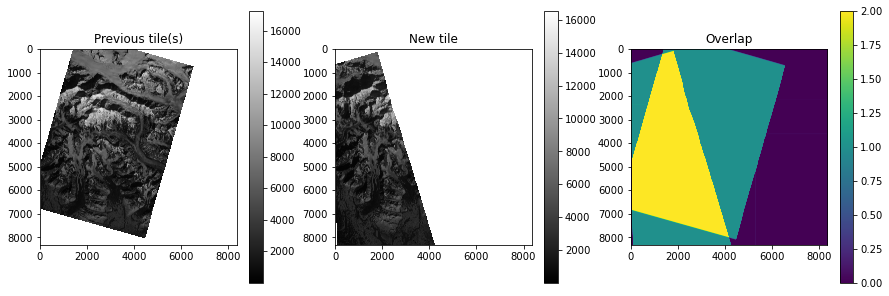

Previous tile is larger.
Mean difference in values from the larger tile in overlap area: 118.18262582234723
New mean diff: 0.0


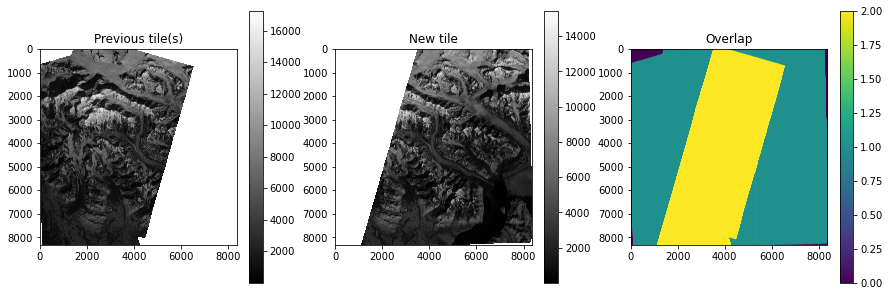

Current tile is larger.
Mean difference in values from the larger tile in overlap area: -156.44232534190542
New mean diff: 0.0


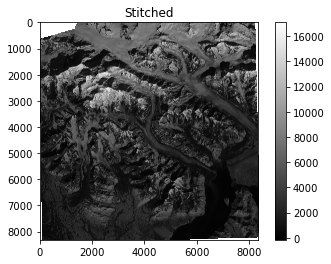

TILES FOR 20200913
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200913_1050.tif', '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200913_1058.tif']


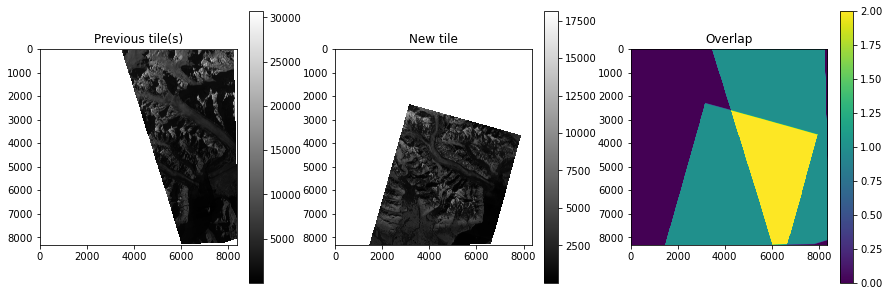

Previous tile is larger.
Mean difference in values from the larger tile in overlap area: 354.49180984985355
New mean diff: 0.0


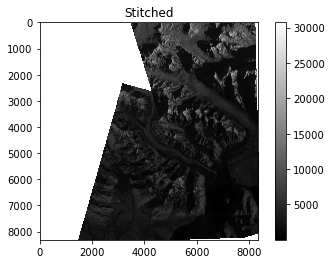

TILES FOR 20200914
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200914_1054.tif', '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200914_1025.tif']


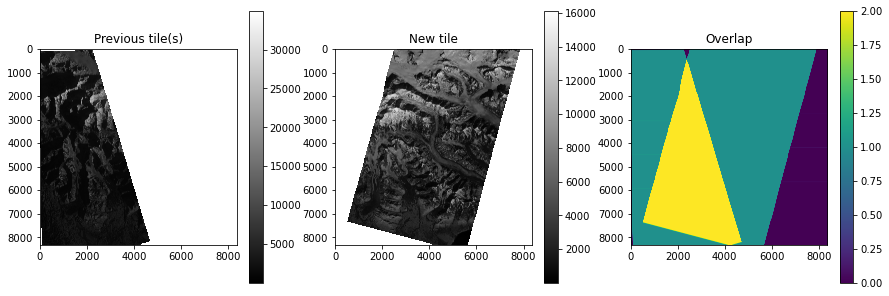

Previous tile is larger.
Mean difference in values from the larger tile in overlap area: 260.68766676345876
New mean diff: 0.0


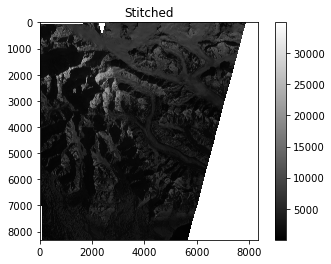

TILES FOR 20200915
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200915_1061.tif']


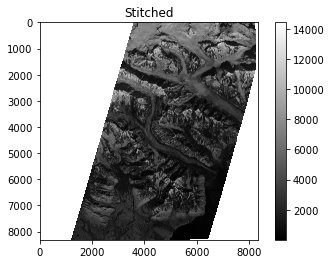

TILES FOR 20200916
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200916_100d.tif', '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200916_106e.tif', '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200916_2231.tif']


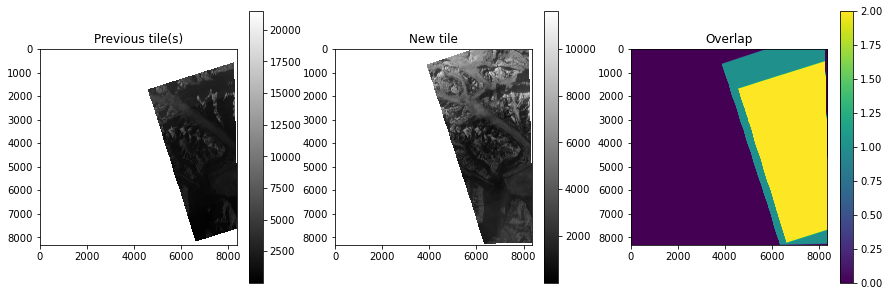

Previous tile is larger.
Mean difference in values from the larger tile in overlap area: 63.71603880845487
New mean diff: 0.0


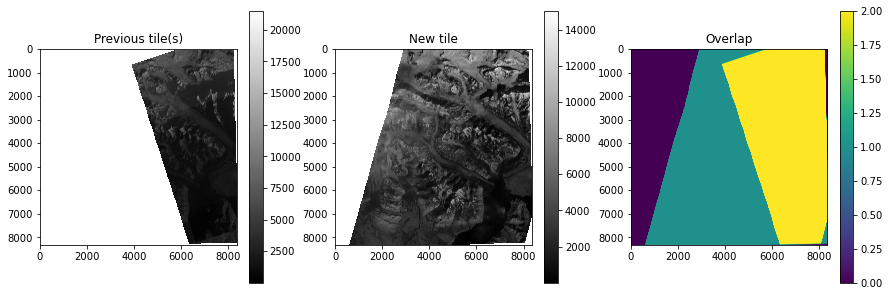

Current tile is larger.
Mean difference in values from the larger tile in overlap area: 218.04666044168212
New mean diff: 0.0


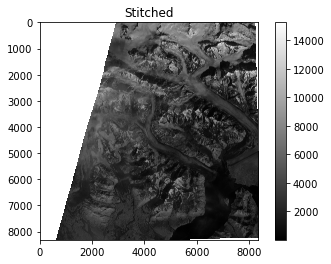

TILES FOR 20200918
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200918_1066.tif', '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200918_106c.tif', '/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200918_2412.tif']


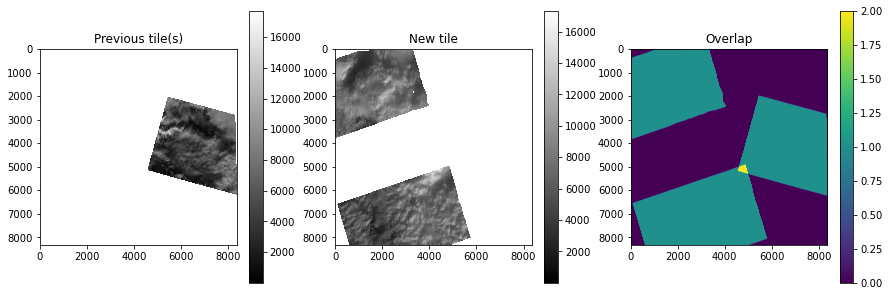

Previous tile is larger.
Mean difference in values from the larger tile in overlap area: -7411.501063991746
New mean diff: -5482.321128469357


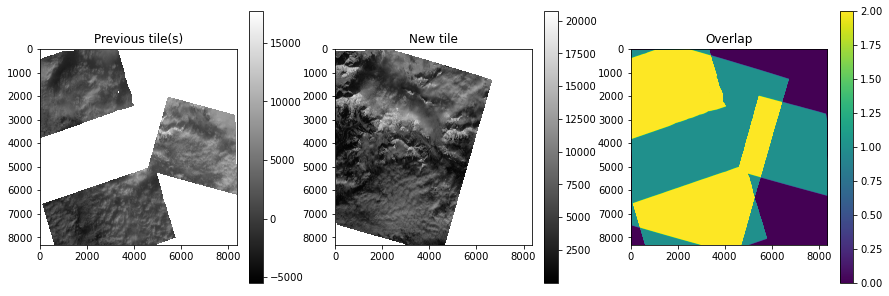

Current tile is larger.
Mean difference in values from the larger tile in overlap area: 4296.926958338778
New mean diff: 0.0


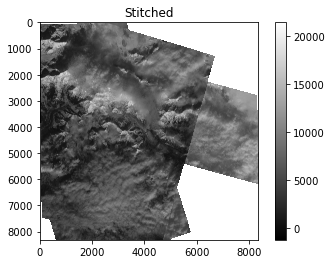

TILES FOR 20200919
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200919_1040.tif']


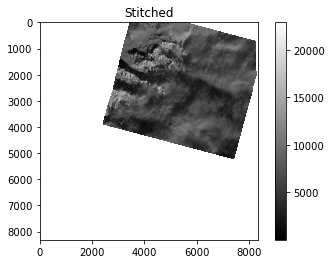

TILES FOR 20200924
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200924_1014.tif']


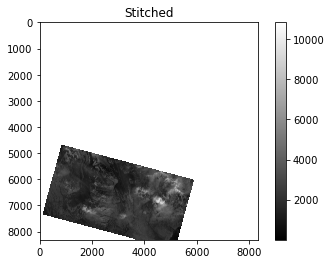

TILES FOR 20200926
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200926_105a.tif']


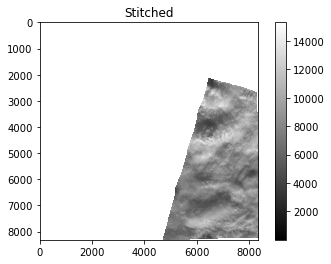

TILES FOR 20200929
['/Volumes/SURGE_DISK/PS_downloads_SK/2020-09/PSScene/standard_grid/stitched_by_sat/PS_20200929_2304.tif']


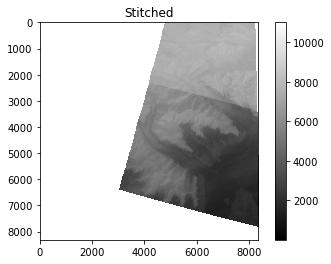

In [75]:
for date in unique_dates:  
    print('TILES FOR', date)
    tiles = glob.glob(basepath+'stitched_by_sat/PS_'+date+'*.tif') # grab all file paths for that date
    print(tiles)
    
    # initialize empty arrays
    reftile_reader = rio.open(tiles[0]); reftile = reftile_reader.read(1)
    overlap_total = np.zeros(reftile.shape);
    sr_stitched = np.zeros(reftile.shape) # start with empty stitched product
    t = 0 # tile count

    # Create glacier_ice_mask
    out_image, out_transform = mask(reftile_reader, [mapping(glacier[0])], crop=True)
    crop_array = out_image[0,:,:]
    crop_array[np.isnan(crop_array)] = 1; crop_array[crop_array > 0] = 1; # set to binary glacier area
    glacier_ice_mask = crop_array
    # y direction:
    y_add = 0 # default don't add
    half_diffy = (reftile.shape[0] - glacier_ice_mask.shape[0])/2
    if half_diffy < np.ceil(half_diffy):
        half_diffy = np.floor(half_diffy)
        y_add = 1
    half_diffy = int(half_diffy)

    # x-direciton
    x_add = 0 # default don't add
    half_diffx = (reftile.shape[1] - glacier_ice_mask.shape[1])/2
    if half_diffx < np.ceil(half_diffx):
        half_diffx = np.floor(half_diffx)
        x_add = 1
    half_diffx = int(half_diffx)

    # add the half diffs to glacier_ice_mask
    [ylen,xlen] = glacier_ice_mask.shape
    # y direction
    test_mask = np.concatenate([np.zeros((half_diffy,xlen)), glacier_ice_mask, np.zeros((half_diffy+y_add,xlen))],axis=0)
    [ylen,xlen] = test_mask.shape
    test_mask = np.concatenate([np.zeros((ylen, half_diffx)), test_mask, np.zeros((ylen, half_diffx+x_add))],axis=1)
    test_mask.shape

    glacier_ice_mask = test_mask
    
    for tile in tiles:
        reader = rio.open(tile); sr = reader.read(1) # load the tile
        sr[sr == 0] = np.NaN # remove black background, replace with Nans
        sr_data = sr.copy() # make a copy of the data before making the data binary
        sr[sr>0.0] = 1 ; sr[np.isnan(sr)] = 0 # make tile binary
        
        tilesize = np.count_nonzero(sr) # grab the current tile size (pixels)
        overlap_total = overlap_total+sr # add new overlap to overlap total
        
        if t == 0: # for the first tile
            sr_stitched = sr_stitched+sr_data # add the data to sr_stitched
            overlap_area = 0 # no overlap area for the first tile
        
        else: # for all subsequent tiles, do iterative normalization based on overlapping area, if any
            overlap_area = np.count_nonzero(overlap_total[overlap_total >= 2]) # update total overlap area
            
#             # Plot the tile comparison and overlap
#             fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
#             im1 = ax1.imshow(sr_stitched,cmap='gray'); ax1.set_title('Previous tile(s)'); fig.colorbar(im1,ax=ax1)
#             im2 = ax2.imshow(sr_data,cmap='gray'); ax2.set_title('New tile'); fig.colorbar(im2, ax=ax2)
#             im3 = ax3.imshow(overlap_total,vmin=0,vmax=2); ax3.set_title('Overlap'); fig.colorbar(im3,ax=ax3)
#             plt.show()
            
            # if the total overlap area has increased (i.e., new overlap)
            if overlap_area > prev_overlap: # increase in overlapping area indicates we have 2 overlapping tiles!!!
                overlap_band = ma.masked_not_equal(overlap_total, 2) # identify non-overlapping area (not 2)
                overlap_band_mask = ma.getmaskarray(overlap_band) # grab the mask for the overlapping area
                
                # identify which tile is larger
                if tilesize > prev_tilesize:
                    print('Current tile is larger.')
                    larger_tile = sr_data; smaller_tile = sr_stitched # assign the tiles
                elif tilesize < prev_tilesize:
                    print('Previous tile is larger.')
                    larger_tile = sr_stitched; smaller_tile = sr_data # assign the tiles
                else: # equal sizes
                    print('Tiles are the same size.')
                    larger_tile = sr_data; smaller_tile = sr_stitched # use current tile to coregister
                
                # grab mean pixel difference from overlapping area (ON GLACIER)
                overlap_values_l = ma.masked_where(overlap_band_mask, larger_tile)
                overlap_values_larger = ~overlap_values_l.mask*overlap_values_l.data
                overlap_values_s = ma.masked_where(overlap_band_mask, smaller_tile)
                overlap_values_smaller = ~overlap_values_s.mask*overlap_values_s.data
                diff = np.nanmedian(np.subtract(overlap_values_larger,overlap_values_smaller)) # median diff
                print('Mean difference in values from the larger tile in overlap area:', diff)
                
                # mean difference in overlapping area over glacier
                overlap_glacier_l = ma.masked_where(glacier_ice_mask, overlap_values_larger)
                overlap_glacier_larger = overlap_glacier_l.mask*overlap_glacier_l.data
                overlap_glacier_s = ma.masked_where(glacier_ice_mask, overlap_values_smaller)
                overlap_glacier_smaller = overlap_glacier_s.mask*overlap_glacier_s.data
                diff2 = np.nanmedian(np.subtract(overlap_glacier_larger,overlap_glacier_smaller))
                print('New mean diff:', diff2)
                
                if diff2 != 0: # if there is glacier overlap, only shift with glacier difference
                    
                    # normalize the smaller tile's values to the larger reference tile's overlap values
                    smaller_tile_coreg = smaller_tile + diff2 # add the mean difference to all values
                    smaller_tile_coreg = ma.masked_where(~overlap_band_mask, smaller_tile_coreg) 

                    # remove overlap area from smaller tile:
                    masked_smaller_tile_coreg = ~smaller_tile_coreg.mask*smaller_tile_coreg.data
                    
#                     # SHOW THE OVERLAPPING AREA:
#                     plt.imshow(overlap_glacier_smaller); plt.colorbar(); plt.show()
                    
                else: # If not, shift with overlapping difference
                    smaller_tile_coreg = smaller_tile + diff # add the mean difference to all values
                    smaller_tile_coreg = ma.masked_where(~overlap_band_mask, smaller_tile_coreg) 

                    # remove overlap area from smaller tile:
                    masked_smaller_tile_coreg = ~smaller_tile_coreg.mask*smaller_tile_coreg.data
                  
                # add them to the stitched produdct
                sr_stitched = np.nansum([masked_smaller_tile_coreg, larger_tile],0) 
                overlap_total[overlap_total > 0] = 1 # refresh overlap total
            else: # if no overlap, just add them without doing anything
                sr_stitched = np.nansum([sr_data, sr_stitched],0) # add them to the stitched product

        # Store tile info for the next round of comparison
        prev_overlap = overlap_area # amount of pixels overlapping
        prev_tilesize = np.count_nonzero(sr_stitched) # previous tile size (pixels w/ data)
        sr_prev = sr_data
        sr_stitched[sr_stitched == 0]=np.NaN # fill black pixels with NaNs
        t += 1 # increment tile count
        
#     # Plot final stitched image
#     fig = plt.figure(); im = plt.imshow(sr_stitched, cmap='gray'); plt.title('Stitched'); 
#     fig.colorbar(im); plt.show()

    # Export stitched image
    outfilename = 'PS_'+date+'.tif'
    if not os.path.exists(basepath+"stitched_images/"):
        os.mkdir(basepath+"stitched_images/")
    with rio.open(basepath+"stitched_images/"+outfilename,'w',
                        driver='GTiff',
                        height=sr_stitched.shape[0], # new shape
                        width=sr_stitched.shape[1], # new shape
                        dtype=sr_stitched.dtype, # data type
                        count=1,
                        crs=reftile_reader.crs, # the EPSG from the original DEM
                        transform=reftile_reader.transform) as dst:
            dst.write(sr_stitched, 1)
    #break
    del overlap_total; del sr_stitched # clear variables
    